# **Chapter 1. Foundations**
---
---

The aim of this chapter is to explain some foundational mental models that are essential for understanding how neural networks work. Specifically, we'll cover *nested mathematical functions and their derivatives.* We'll work our way up from the simplest possible building bloks to show that we can bild complicated functions made up of "chain" of constituent functions and, even when one of these functions is a matrix multiplication that takes in multiple inputs, compute the derivativeof the functions outputs with respect to their inputs.

As we're getting our bearings around these foundational building blocks of neural networks, we'll systematically descrive each concept we introduce from three perspectives:
* `Math`, in the form of an equation or equations
* `Code`, with as little axtra syntax as possible (making Python as ideal choice)
* A diagram explaining what is going on, of kind you would draw on a whitebboard during a coding interview.

With that out of the way, it’s time to take our first steps. We’re going to start with some extremely simple building blocks to illustrate how we can understand different concepts in terms of these three perspectives. Our first building block will be a simple but critical concept: `the function`.

## # Functions
---

What is a function, and how we descrive it? As with neural nets, there are several ways to describe functions, none of which  individually paints complete picture. Rather than trying give a pithy one-sentence description, let's simply walk through three mental models one by one, playing the role of the blind men feeling different parts of the elephant.

### ## Math

Here ara two exammples of functions, describbed in mathematical notation:
* $f_1(x) = x^2$
* $f_2(x) = max(x, 0)$

This notations says that the functions, which we arbbitrarily call $f_1$ and $f_2$, take in a nuber $x$ as input and transform it into $x^2$ (in first case) of $max(x, 0)$ (in the second case).

### ## Diagrams

One way of depicting functions is to:
1. Draw an $x-y$ plane (where $x$ refers to the horizontal axis and $y$ refer to vertical axis).
2. Plot a bunch of points, where the x-coordinates of the points are (usually evenly spaced) inputs of the function over some range, and the y-coordinates are the outputs of the function over that range.
3. Connect these plotted points.

Figure 1-1 shows the plot of these two functions.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0101.png" width="600px"/>
    <i>Figure 1-1. Two continuous, mostly differentiable functions</i>
</div>

However, there is another way to depict functions that isn’t as useful when learning calculus but that will be very useful for us when thinking about deep learning models. We can think of functions as boxes that take in numbers as input and produce numbers as output, like minifactories that have their own internal rules for what happens to the input. Figure 1-2 shows both these functions described as general rules and how they operate on specific inputs.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0102.png" width="600px"/>
    <i>Figure 1-2. Another way of looking at these functions</i>
</div>

### ## Code

Finally, we can describe these functions using code. Before we do, we should say a bit about the Python library on top of which we'll writting our functions: NumPy.

#### CODE CAVEAT #1: NUMPY

NumPy is a widely used Python library for fast numeric computation, the internals of which are mostly written in C. Simply put: the data we deal with in neural networks will always be held in a multidimensional array that is almost always either one-, two-, three-, or four-dimensional, but especially two- or three-dimensional. The ndarray class from the NumPy library allows us to operate on these arrays in ways that are both (a) intuitive and (b) fast. To take the simplest possible example: if we were storing our data in Python lists (or lists of lists), adding or multiplying the lists elementwise using normal syntax wouldn’t work, whereas it does work for ndarrays:


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable, Dict, List

In [2]:
np.set_printoptions(precision=4)

In [3]:
print("Python list operations:")

a = [1, 2, 3]
b = [4, 5, 6]

print("a + b : ", a + b)

try:
    print(a * b)
except TypeError:
    print("a * b has no meaning for Python lists")
    
print()
print("Numpy array operation:")

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("a + b : ", a + b)
print("a * b : ", a * b)

Python list operations:
a + b :  [1, 2, 3, 4, 5, 6]
a * b has no meaning for Python lists

Numpy array operation:
a + b :  [5 7 9]
a * b :  [ 4 10 18]


ndarrays also have several features you'd expect from an n-dimensional array; each ndarray has n axis, indexed from 0, so that the first axis is 0, the second is 1, and so on. In particular, since we deal with 2D ndarrays often, we can think od axis = 0 as the rows and axis = 1 as the columns--see Figure 1-3.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0103.png" width="300px"/>
    <i>Figure 1-3. A 2D NumPy array, with axis = 0 as the rows and axis = 1 as the columns</i>
</div>

NumPy's ndarrays also support applying functions along these axes in intuitive ways. For example, summing along axis 0 (the *rows* for a 2D array) essentially "collapses the array" along that axis returning an array with one less dimension the the original array; for a 2D array, this is equivalent to summing each column:

In [4]:
a = np.array([[1, 2, 3],
             [4, 5, 6]])

In [5]:
print("a:")
print(a)
print("a.sum(axis=0) : ", a.sum(axis=0))
print("a.sum(axis=1) : ", a.sum(axis=1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis=0) :  [5 7 9]
a.sum(axis=1) :  [ 6 15]


Finnaly, NumPy ndarrays support adding a 1D array to the last axis; for a 2D aray a with R rows and C columns, this means we can add a 1D array b of length C and NumPy will do the additional in the intuitive way, adding the elements to each row of a:

In [6]:
b = np.array([10, 20, 30])

print("a + b : \n", a + b)

a + b : 
 [[11 22 33]
 [14 25 36]]


#### CODE CAVEAT #2: TYPE - CHECKED FUNCTIONS

As I've mentioned, the primary goal of the code we write in this book is to make the concepts I'm explaining precise and clear. This will get more challenging as the book goes on, as we'll be writing functions with many arguments as part of complicated class. To combat this, we'll use functions with type signatures throughtout as follows:

```python
def __init__(self,
             layers: List[Layer],
             loss: Loss,
             learning_rate: Float = 0.01) -> None:
```

This type signature alone give you some idea of what the class is used for. By contrast, consider the following type signature that we could use the define an operation:

```python
def operation(x1, x2):
```

This type signature by itself gives you no hint as to what is going on; only by printing out each object’s type, seeing what operations get performed on each object, or guessing based on the names x1 and x2 could we understand what is going on in this function. I can instead define a function with a type signature as follows:

```python
def operation(x1: ndarray, x2: ndarray) -> ndarray:
```

You know right away that this is a function that takes in two ndarrays, probably combines them in some way, and outputs the result of that combination. Because of the increased clarity they provide, we’ll use type-checked functions throughout this book.

#### BASIC FUNCTIONS IN NUMPY

With these preliminaries in mind, let's write up the functions we defined earlier in NumPy:

In [7]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray.
    '''
    return np.maximum(0.2 * x, x)

In [8]:
IMG_FOLDER_PATH = os.path.join("asset", "chapter_1", "images")
PDF_FOLDER_PATH = os.path.join("asset", "chapter_1", "pdf_images")

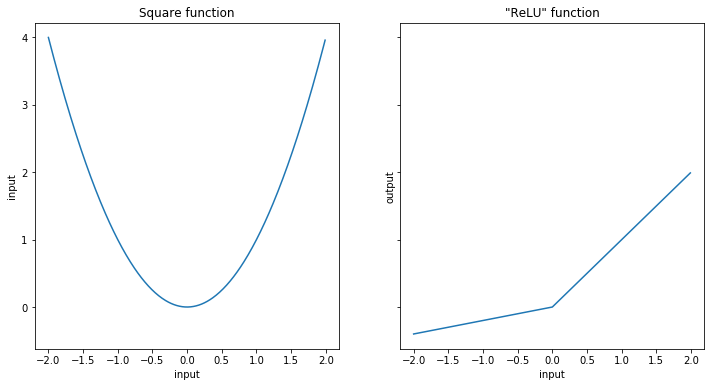

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('input')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')

plt.savefig(os.path.join(IMG_FOLDER_PATH, "01_two_functions.png"))
plt.savefig(os.path.join(PDF_FOLDER_PATH, "01_two_functions.pdf"))

<h3 align="center"><strong>NOTE</strong></h3>

> One of NumPy’s quirks is that many functions can be applied to ndarrays either by writing np.function_name(ndarray) or by writing ndarray.function_name. For example, the preceding relu function could be written as: x.clip(min=0). We’ll try to be consistent and use the np.function_name(ndarray) convention throughout—in particular, we’ll avoid tricks such as ndarray.T for transposing a two-dimensional ndarray, instead writing np.transpose(ndarray, (1, 0)).

## # Derivatives
---

Derivatives, like functions, are an extremely important concept for understanding deep learning that many of you are probably familiar with. Also like functions, they can be depicted in multiple ways. We’ll start by simply saying at a high level that the derivative of a function at a point is the “rate of change” of the output of the function with respect to its input at that point. Let’s now walk through the same three perspectives on derivatives that we covered for functions to gain a better mental model for how derivatives work.

### ## Math

First, we'll get mathematically precise: we can describe this numer--how much the output of $f$ changes as we change its input at a particualar value $a$ of the input--as a limit:

$$ \frac{df}{du}(a)=\lim_{\Delta \rightarrow 0}\frac{f(a + \Delta) - f(a - \Delta)}{2 \times \Delta} $$

This limit can bbe approximated numerically by setting a very small value for $\delta$, such as 0.0001, so we can compute the derivatice as:

$$ \frac{df}{du}(a)=\lim_{\Delta \rightarrow 0}\frac{f(a + 0.0001) - f(a - 0.0001)}{0.002} $$

While accurate, this is onle one part of a full mental model of derivatives. Let's look at them from another perspective: a diagram.

### ## Diagram

First, the familiar way: if we simply draw a tangent line to the Cartesian representation of the function $f$, the derivative of $f$ at point $a$ is just the slope of this line at $a$. As with the mathematical descriptions in the prior subsecsion, there are two ways we can actually calculate the slope of this line. The first would be to use calculus to actually calcualte the limit. The second would be to just take the slope of the line connecting $f$ at $a - 0.001$ and $a+0.001$. The latter method is depicted in Figure 1-4 and should e familiar to anyone who has taken calculus.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0104.png" width="600px"/>
    <i>Figure 1-4. Derivatives as slopes</i>
</div>

As we saw in the prior section, another way of thisnking of functions is as mini-factories. Now think of the inputs to those factories being connected to the outputs by a string. The derivative is equal to the answer to the fact that the function may be asymmetric at $a$, pull down on $a$ by some small amount--by what multiple of this small amount will the output change, given the inner workings of the factory? This is depicted in Figure 1-5.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0105.png" width="400px"/>
    <i>Figure 1-5. Another way of visualizing derivatives</i>
</div>

This second representation will turn out to be more important the the dirst one for understanding deep learning.

### ## Code

Finally, we can code up the apprixamtion to the derivative that we saw previously:

In [10]:
def deriv(func: Callable[[ndarray], ndarray], 
          input_: ndarray, 
          diff: float = 0.001) -> ndarray:
    '''
    Evaluates the derivatives of a fucntuion "func" at every element in the "input_" array.
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

<h3 align="center"><strong>NOTE</strong></h3>

> When we say that “something is a function of something else”—for example, that $P$ is a function of $E$ (letters chosen randomly on purpose), what we mean is that there is some function $f$ such that $f(E) = P$—or equivalently, there is a function $f$ that takes in $E$ objects and produces $P$ objects. We might also think of this as meaning that $P$ is defined as whatever results when we apply the function $f$ to $E$:
<img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_01in01.png" width="400px"/>
And we would code this up as:

```python
def f(input_: ndarray) -> ndarray:
    #some transformation(s)
    return output

P = f(E)
```

## # Nested Functions
---

Now we’ll cover a concept that will turn out to be fundamental to understanding neural networks: functions can be “nested” to form “composite” functions. What exactly do I mean by “nested”? I mean that if we have two functions that by mathematical convention we call f1 and f2, the output of one of the functions becomes the input to the next one, so that we can “string them together.”

### ## Diagram

The most natural way to represent a nested function is with the “minifactory” or “box” representation. As Figure 1-6 shows, an input goes into the first function, gets transformed, and comes out; then it goes into the second function and gets transformed again, and we get our final output.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0106.png" width="600px"/>
    <i>Figure 1-6. Nested functions, naturally</i>
</div>

### ## Math

We should also include the less intuitive mathematical representation:

$$f_2(f_1(x)) = y$$

This is less intutive beacause of the quirk that nasted functions are read "from the outside in" but in operations are in fact performed "from the inside out". For example, through $f2(f1(x)) = y$ is read "$f_2$ of $f_1$ of $x$" what it really means is to "first apply $f_1$ to $x$m and then apply $f_2$ to the result of applying $f_1$ to $x$".

### ## Code

First, we'll define a data type for nasted functions:

In [11]:
# A Function take in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]

Then we'll define how data goes through chain, first of length 2:

In [12]:
def chain_length_2(chain: Chain, 
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"
    
    f1 = chain[0]
    f2 = chain[1]
    
    return f2(f1(x))

### ## Another Diagram

Depicting the nested function using the box representation shows us that this composite function is really just a single function. Thus, we can represent this function as simply $f1 f2$, as shown in Figure 1-7.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0107.png" width="400px"/>
    <i>Figure 1-7. Another way to think of nested functions</i>
</div>

Moreover, a theorem from calculus tells us that a composite function made up of “mostly differentiable” functions is itself mostly differentiable! Thus, we can think of $f1f2$ as just another function that we can compute derivatives of—and computing derivatives of composite functions will turn out to be essential for training deep learning models.

However, we need a formula to be able to compute this composite function’s derivative in terms of the derivatives of its constituent functions. That’s what we’ll cover next.

## # The Chain Rule
---

The chain rule is a mathematical theorem that lets us compute derivatives of composite functions. Deep learning models are, mathematically, composite functions, and reasoning about their derivatives is essential to training them, as we'll see in  the next couple of chapters.

### ## Math

Mathematically, the theorem states--in a rather nonintuitive form-- that, for a given values x,

$$ \frac{df_2}{dx}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

where $u$ is simply a dummy valriable representing the input to a function.

<h3 align="center"><strong>NOTE</strong></h3>

> When describing the derivative of a function $f$ with one input and output, we can denote the function that represents the derivative of this function as $\frac{df}{du}$. We could use a different dummy variable in place of $u$—it doesn’t matter, just as $f(x) = x^2$ and $f(y) = y^2$ mean the same thing. <br><br>
On the other hand, later on we’ll deal with functions that take in multiple inputs, say, both $x$ and $y$. Once we get there, it will make sense to write $\frac{df}{dx}$ and have it mean something different than $\frac{df}{dy}$. <br><br>
This is why in the preceding formula we denote all the derivatives with a $u$ on the bottom: both $f_1$ and $f_2$ are functions that take in one input and produce one output, and in such cases (of functions with one input and one output) we’ll use u in the derivative notation.

### ## Diagram

The preceding formula does not give much intuition into the chain rule. For that, the box representation is much more helpful. Let’s reason through what the derivative “should” be in the simple case of $f_1 f_2$.

<div align="center">
    <img src="https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/assets/dlfs_0108.png" width="600px"/>
    <i>Figure 1-8. An illustration of the chain rule</i>
</div>

Intutitively, using the diagram in Figure 1-8, the derivative of the composite function *should* be a sort of product of the derivatives of its constituent functions. Let's say we feed the value $5$ into the first function, and let's say futher that computing the * derivative* of the first functions at $u = 5$ gives us a value of $3$--that is, $\frac{df_1}{du}(5) = 3$.

Let’s say that we then take the value of the function that comes out of the first box--let’s suppose it is $1$, so that $f_1(5) = 1$--and compute the derivative of the second function $f_2$ at this value: that is, $\frac{df_2}{du}(1)$. We find that this value is $–2$.

If we think about these functions as being literally strung together, then if changing the input to box two by $1$ unit yields a change of $–2$ units in the output of box two, changing the input to box two by $3$ units should change the output to box two by $–2 \times 3 = –6$ units. This is why in the formula for the chain rule, the final result is ultimately a product: $\frac{df_2}{du}(f1(x)) times \frac{df_1}{du}(x)$.

So by considering the diagram and the math, we can reason through what the derivative output of a nesdted function with respect to its input ough to be, using the chain rule, What might the code instructions for the computation of this derivative look like?

### ## Code

Let's code this up and show that computation derivatives in this way goes in fact yield results that "look correct." We'll use the `sequare` function from "Basic functions in NumPy" along with `sigmoid`, another functions that ends up being important in deep learning:

In [13]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input array.
    '''
    return 1 / (1 + np.exp(-x))

And now we code up the chain rule:

In [14]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nasted functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''
    assert len(chain) == 2, \
    "This function requires 'chain' objects of length 2"
    
    assert input_range.ndim == 1, \
    "Function rquires a 1 demensional ndarray as input_range"
    
    f1 = chain[0]
    f2 = chain[1]
    
    # df1/dx
    f1_of_x = f1(input_range)
    
    # df1/du
    df1dx = deriv(f1, input_range)
    
    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))
    
    return df1dx * df2du

Figure 1-9 plots the results and shows that the chain rule works:

In [15]:
def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings -
    across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    
    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [16]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a 
    function consisting of two nasted functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

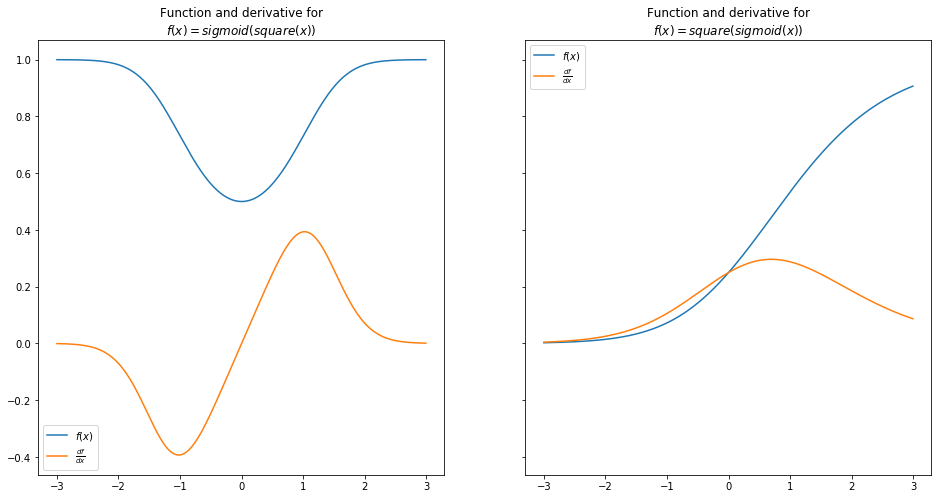

In [17]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$")

plt.savefig(os.path.join(IMG_FOLDER_PATH, "02_plot_chain_rule_1.png"))
plt.savefig(os.path.join(PDF_FOLDER_PATH, "02_plot_chain_rule_1.pdf"))

<div align="center"><i>Figure 1-9. The chain rule works, part 1</i></div>

The chain rule seems to be working. When the functions are upward-sloping, the derivative is positive; when they are flat, the derivative is zero; and when they are downward-sloping, the derivative is negative.

So we can in fact compute, both mathematically and via code, the derivatives of nested or “composite” functions such as $f_1 f_2$, as long as the individual functions are themselves mostly differentiable.

It will turn out that deep learning models are, mathematically, long chains of these mostly differentiable functions; spending time going manually through a slightly longer example in detail will help build your intuition about what is going on and how it can generalize to more complex models.